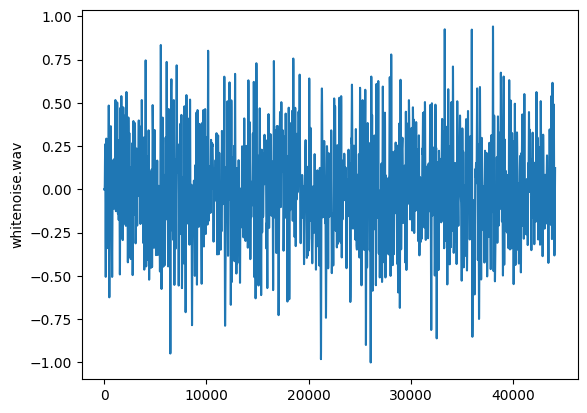

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'whitenoise.wav'
desired_sample_rate = 16000.0
desired_resolution = 16

data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [2]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[ 6.0074160e-07  2.1612937e-06 -3.6995884e-06 ...  9.6743271e-02
  1.0424104e-01  1.2816885e-01]
length 16000
max value 0.9396924
min value -0.9999758
value range 1.9396682


In [7]:
filename = soundfile[:-4]
m68code = "/*\n    File "+soundfile+ "\r\n*/\r\n\n"
m68code += "#define "+ filename + "_length "+str(len(data_out))+" \r\n\r\n"
m68code += "#define "+ filename + "_sample_rate " + str(int(desired_sample_rate)) + "\r\n\r\n"
m68code += "const uint8_t " + filename + "_data[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    v =  int((isin * 255))
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)    

/*
    File whitenoise.wav
*/

#define whitenoise_length 16000 

#define whitenoise_sample_rate 16000

const uint8_t whitenoise_data[] = {
    131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,
    131,131,132,132,133,134,136,138,140,143,145,149,152,155,158,161,
    163,164,165,165,164,162,158,154,148,142,135,127,119,111,103,95,
    88,81,76,71,68,65,65,65,67,69,73,78,84,91,98,105,
    113,120,128,135,141,147,153,157,161,164,167,168,169,170,169,169,
    168,167,166,164,163,162,161,160,159,158,158,157,156,156,155,154,
    153,152,151,149,147,145,143,140,137,134,130,127,122,118,114,109,
    105,101,97,94,91,89,87,87,86,87,89,91,93,97,100,104,
    108,112,115,119,122,124,126,128,129,130,131,131,132,132,133,134,
    135,136,138,140,143,147,151,155,160,164,169,174,179,184,188,191,
    193,194,195,193,191,187,181,174,166,156,146,135,124,112,101,90,
    80,71,63,57,52,50,49,50,53,57,63,71,79,88,98,108,
    117,127,135,143,150,156,161,164,167,168,167,166,165,162,159,156,
    153,